In [ ]:
from google.colab import files

In [ ]:
files.upload()  # <================= Veuillez importer le fichier 'treebasednetworks.py'

Saving treebasednetworks.py to treebasednetworks.py


{'treebasednetworks.py': b'# -*- coding: utf-8 -*-\n"""TreeBasedNetworks.ipynb\n\nAutomatically generated by Colaboratory.\n\nOriginal file is located at\n    https://colab.research.google.com/drive/1nmhj-_a2ZugMWGUKZceOhr5CgsDk8gwz\n"""\n\nimport networkx as nx\nimport random\nimport matplotlib.pyplot as plt\nimport pandas as pd\nfrom functools import reduce\nfrom asymmetree.treeevolve.SpeciesTree import species_tree_n\nfrom asymmetree.tools.PhyloTreeTools import (to_newick,)\nfrom tralda.datastructures.Tree import Tree\n\nclass TransferManager:\n    def __init__(self):\n        pass\n\n    def add_transfer_to_tree(self, G, pw, w, pay, ay, c, max_node_value):\n\n        """\n            Ajoute un transfert au graphe G.\n\n            Cette fonction effectue les \xc3\xa9tapes n\xc3\xa9cessaires pour ajouter un transfert au graphe G. Elle supprime d\'abord les ar\xc3\xaates\n            entre les n\xc5\x93uds pw, w, pay et ay, puis ajoute de nouveaux n\xc5\x93uds et ar\xc3\xaates pour r

In [ ]:
pip install asymmetree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 kB 5.1 MB/s eta 0:00:00


Nœud 1:0
Nœud 2:5
Nœud 3:15
Nœud 4:35
Nœud 5:35
Nœud 6:20
Nœud 7:35
Nœud 8:35
Nœud 9:10
Nœud 10:25
Nœud 11:35
Nœud 12:35
Nœud 13:30
Nœud 14:35
Nœud 15:35
numero du caractere choisi:  3


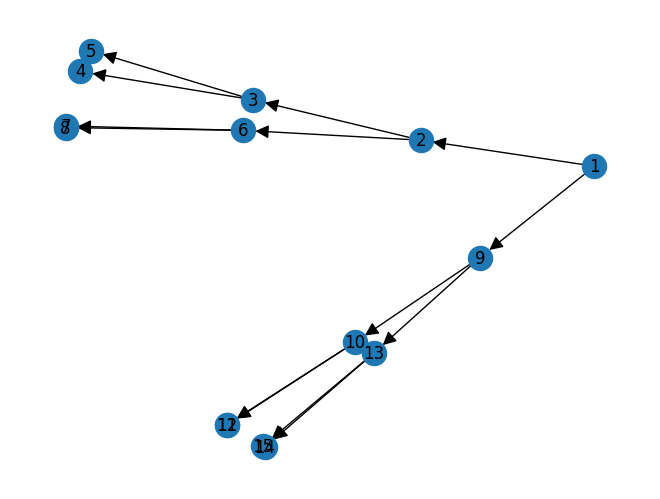

------------------------Leaf Labels------------------------
Feuille 4: [0, 1, 1]
Feuille 5: [0, 1, 1]
Feuille 7: [1, 1, 0]
Feuille 8: [0, 0, 0]
Feuille 11: [0, 1, 1]
Feuille 12: [1, 0, 1]
Feuille 14: [1, 0, 0]
Feuille 15: [0, 0, 0]

-------------------------------------
{1: {'Characters': [None, None, None], 'spece': None}, 2: {'Characters': [None, None, None], 'spece': None}, 3: {'Characters': [None, None, None], 'spece': None}, 4: {'Characters': [0, 1, 1], 'spece': 4}, 5: {'Characters': [0, 1, 1], 'spece': 5}, 6: {'Characters': [None, None, None], 'spece': None}, 7: {'Characters': [1, 1, 0], 'spece': 7}, 8: {'Characters': [0, 0, 0], 'spece': 8}, 9: {'Characters': [None, None, None], 'spece': None}, 10: {'Characters': [None, None, None], 'spece': None}, 11: {'Characters': [0, 1, 1], 'spece': 11}, 12: {'Characters': [1, 0, 1], 'spece': 12}, 13: {'Characters': [None, None, None], 'spece': None}, 14: {'Characters': [1, 0, 0], 'spece': 14}, 15: {'Characters': [0, 0, 0], 'spece': 15}, 16: 

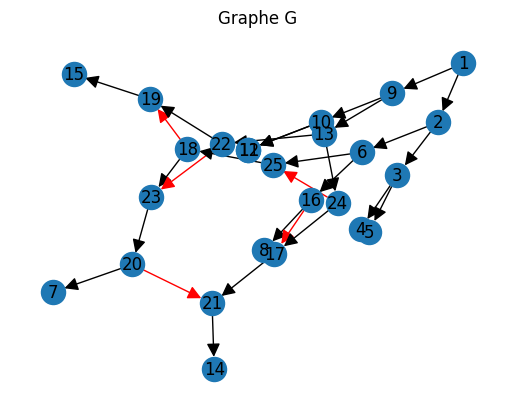

----------------------------------------------------------------------------------------------------------
Nœuds ayant au moins un descendant sans le caractère c3 Fc3: [2, 13, 7, 8, 1, 14, 9, 6, 16, 17, 15, 19, 20, 21, 22, 18, 24, 25, 23]
Graphe Ĝc3:
les noeuds du Ĝc3: [3, 4, 5, 10, 11, 12]



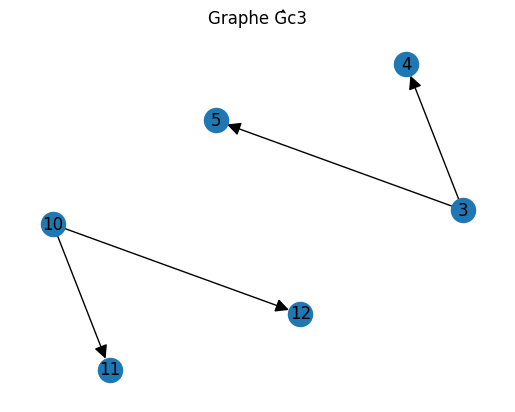

Le graphe Ĝc3 n'est pas faiblement connecté.
l'étiquetage n'est pas possible

None

------------------------Timestamp------------------------
Nœud 1 : 0
Nœud 2 : 5
Nœud 3 : 15
Nœud 4 : 35
Nœud 5 : 35
Nœud 6 : 20
Nœud 7 : 35
Nœud 8 : 35
Nœud 9 : 10
Nœud 10 : 25
Nœud 11 : 35
Nœud 12 : 35
Nœud 13 : 30
Nœud 14 : 35
Nœud 15 : 35
Nœud 16 : 32.5
Nœud 17 : 32.5
Nœud 18 : 32.500001
Nœud 19 : 32.500001
Nœud 20 : 33.7500005
Nœud 21 : 33.7500005
Nœud 22 : 32.500001999999995
Nœud 23 : 32.500001999999995
Nœud 24 : 31.25
Nœud 25 : 31.25


In [ ]:
from treebasednetworks import *

def main():
    # Définir le nombre de caractères
    nbrCaractere = 3

    # Appel de la fonction build_graph_from_newick pour Construire l'arbre G à partir de la chaîne au format Newick
    newick_string = "(((5,4)2,(6,7)3)8,((12,11)10,(13,14)9)15)1;"
    tree_builder = TreeBuilder()
    G, root_id = tree_builder.build_graph_from_newick(newick_string)

    # Initialisation du l'arbre G
    G = tree_builder.initialize_graph(G, nbrCaractere)

    # Ajouter des timestamps aux nœuds du G
    timestamp_manager = TimestampManager()
    G = timestamp_manager.add_timestamp(G, root_id)

    # Appel de la fonction label_leaves pour étiqueter les feuilles pour établir un Non-PTN
    labeler = LeafLabeler()
    G, node1, node2 = labeler.label_leaves_tree(G, nbrCaractere)

    # Affichage l'arbre G avec les étiquettes des feuilles
    tree_builder.drawGraph(G)

    # Ajoute des transferts aléatoires en respectant certaines conditions pour obtenir un graphe non PTN
    transfer_manager = TransferManager()
    G = transfer_manager.add_transfers_to_tree_Non_PTN(G, node1, node2)


    # Affiche les étiquettes des feuilles du graphe
    labeler.display_leaf_labels(G)

    attributes = labeler.set_leaf_attributes(G, nbrCaractere)

    print("\n-------------------------------------")
    print(attributes)
    print("\n-------------------------------------")
    # Liste des caractères à vérifier
    C = [f'c{i+1}' for i in range(nbrCaractere)]

    tree_networks = TreeBasedNetworks()
    # Appel de la fonction findLabeling pour chercher un étiquetage possible
    l = tree_networks.findLabeling(G, attributes, C)

    # Afficher les horodatages
    timestamp_manager.display_timestamps(G)

if __name__ == "__main__":
    main()